# High Level Intuition about Buyer Stage Data
---

In [1]:
!pip install xgboost
import xgboost 
import pandas as pd
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
import matplotlib.pylab as pl
import pandas as pd

    100% |████████████████████████████████| 109.8MB 468kB/s eta 0:00:011
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/distributed/config.py:63: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config.update(yaml.load(text) or {})


In [6]:
# Just using decision tree to get more intuition about user behaviour and their stage definition
def high_level_visualization_and_intuition_of_buyer_intent_data(df):
        f_names = df.columns[0:len(df.columns)-1]
        c_names = ["Dreamer", "Casual Explorer", "Active Searcher", "Ready to Transact"]
        array = df.values
        X = array[:,0:len(df.columns)-1]
        Y = array[:,len(df.columns)-1]
        # prepare configuration for cross validation test harness
        seed = 7
        test_size = 0.33
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
        params = {
            "alpha":0.00024323154907073826,
            "eta": 0.3959767109864848,
            "lambda": 6.229569315092911e-05,
            "objective": "validation:f1",
            "subsample": 0.8509744839970474,
            "max_depth" : 15,
            "min_child_weight" : 2.5049003218066525e-06,
            "num_class":4,
            "num_round":171,
            "eval_metric": "logloss",
            "importance_type":'total_gain'
        }
        model = XGBClassifier(params)
        model = model.fit(X,Y)
        
        model.get_booster().feature_names = f_names.to_list()
        axes= xgboost.plot_importance(model.get_booster(), max_num_features=15)       
        fig = axes.figure
        fig.set_size_inches(14, 9)
        pl.title('Buyer Stage Important Features Rank')
        pl.show()
        return (X, model)

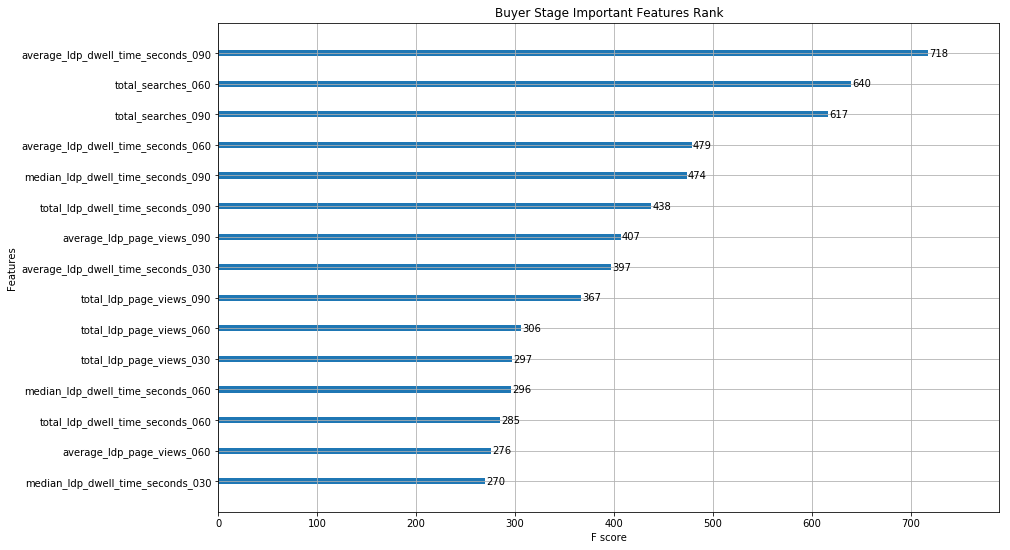

In [7]:
df = pd.read_csv('csvs/buyer_intent_tr_val_set_q1.csv')
(X, model)=high_level_visualization_and_intuition_of_buyer_intent_data(df)